In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:

data= pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_2.csv")
data.sample (3)

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight
7141,1650715,PLANT12,5,PORT09,V444_1,291,10.700000
5025,1683700,PLANT03,0,PORT09,V444_0,3906,2.081639
220,1699417,PLANT03,0,PORT09,V44_3,7282,16.511949


In [3]:
# Select features for anomaly detection
X = data[['Unit_quantity','Weight']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#  It transforms the features such that they have a mean of 0 and a standard deviation of 1

In [4]:
# Create a K-NN model ;
n_neighbors = 5
knn_model = NearestNeighbors(n_neighbors=n_neighbors)
knn_model.fit(X_scaled)

NearestNeighbors()

In [5]:
# Find distances to k-nearest neighbors ; & Calculate anomaly scores ;  Set a threshold to distinguish outliers
distances, _ = knn_model.kneighbors(X_scaled)

anomaly_scores = distances.mean(axis=1)

threshold = np.percentile(anomaly_scores, 99)
print(threshold)

0.25546394988249344


In [6]:
# Identify outliers
outliers = data[anomaly_scores > threshold]

In [7]:
print("Anomaly Scores Above Threshold:", outliers)

Anomaly Scores Above Threshold:       Product_ID Plant_Code  Ship_ahead_day_count Destination_Port Carrier  \
77       1697317    PLANT16                     3           PORT09   V44_3   
82       1697317    PLANT16                     3           PORT09   V44_3   
97       1696799    PLANT16                     3           PORT09   V44_3   
100      1696799    PLANT16                     3           PORT09   V44_3   
101      1696799    PLANT16                     3           PORT09   V44_3   
...          ...        ...                   ...              ...     ...   
6883     1684862    PLANT03                     0           PORT09  V444_0   
6884     1684862    PLANT03                     0           PORT09  V444_0   
6983     1646393    PLANT13                     3           PORT09  V444_0   
8394     1700138    PLANT03                     0           PORT09  V444_1   
8413     1700140    PLANT03                     0           PORT09  V444_1   

      Unit_quantity      Weight

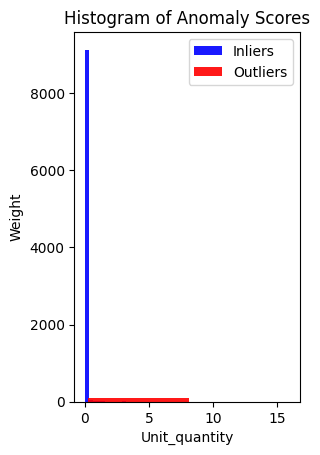

In [8]:
X = data[['Unit_quantity','Weight']]
# Visualize outliers using a histogram
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.9, label='Inliers')
plt.hist(anomaly_scores[anomaly_scores > threshold], bins=2, color='red', alpha=0.9, label='Outliers')
plt.xlabel('Unit_quantity')
plt.ylabel('Weight')
plt.title('Histogram of Anomaly Scores')
plt.legend()

threshold is 0.25546394988249344
Anomaly Scores Above Threshold: [ 0.33715617  0.53284943  0.4448181   0.51348183  0.28617944  0.45677091
  0.50776589  0.35849492  0.44415589  0.26527276  0.4064424   0.27571109
  0.25556566  0.32666995  0.49114834  0.31805349  2.31653612  1.00019698
 15.9482119   0.54029808  0.43157695  0.27528513  0.30384916  0.68630284
  1.03712346  0.6789032   0.29067676  0.5495297   1.47846635  1.32541706
  0.75356614  0.88499231  5.74391977  0.61180017  0.33598065  0.88902367
  0.27596465  0.32876669  0.41283209  0.47466037  1.46607443  2.21958924
  0.32158667  0.37421266  0.5452456   0.40994542  0.34660854  0.33271587
  0.25791875  1.52153869  0.3474741   1.48891179  1.60488219  1.24278435
  0.37615575  0.51475239  0.79239167  0.34373572  0.33055038  0.68464642
  0.34566811  0.32185685  0.26918996  0.4360442   0.3029558   0.27257508
  0.33381333  0.4362144   0.2941182   0.34641222  0.31903035  0.53425806
  0.34157516  0.81772393  1.26242448  6.54095099  0.9499300

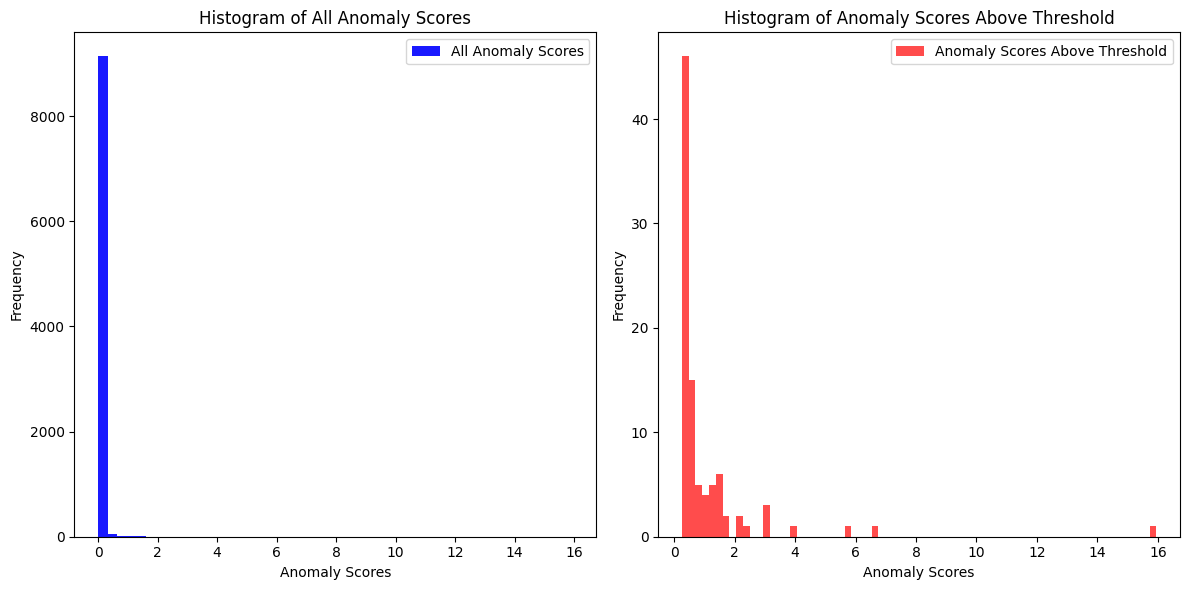

In [9]:
print("threshold is",threshold)
print("Anomaly Scores Above Threshold:", anomaly_scores[anomaly_scores > threshold])

# Create a figure and subplot for the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.9, label='All Anomaly Scores')

plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of All Anomaly Scores')
plt.legend()

plt.subplot(1, 2, 2)

plt.hist(anomaly_scores[anomaly_scores > threshold], bins=70, color='red', alpha=0.7, label='Anomaly Scores Above Threshold')

plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores Above Threshold')
plt.legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, '')

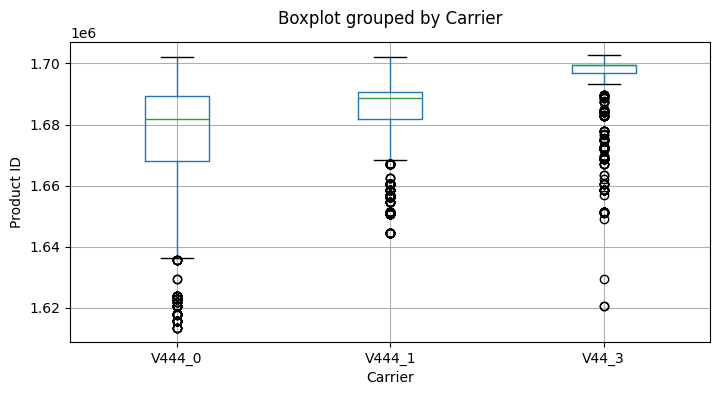

In [10]:
ax=data.boxplot(column="Product_ID", by="Carrier",figsize=(8,4))
ax.set_ylabel("Product ID")
ax.set_title("")

threshold is 0.25546394988249344
 Anomalies in 'Carrier':
     Carrier  Product_ID
77     V44_3     1697317
82     V44_3     1697317
97     V44_3     1696799
100    V44_3     1696799
101    V44_3     1696799
...      ...         ...
6883  V444_0     1684862
6884  V444_0     1684862
6983  V444_0     1646393
8394  V444_1     1700138
8413  V444_1     1700140

[93 rows x 2 columns]


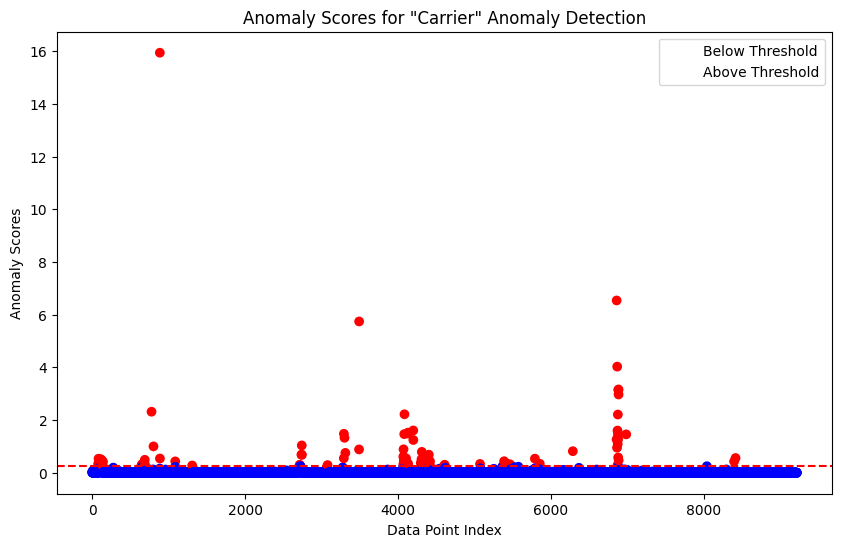

In [11]:
anomaly_scores = distances.mean(axis=1)
#  99th percentile
threshold = np.percentile(anomaly_scores, 99)

anomalies = data[anomaly_scores > threshold]
print("threshold is",threshold)
print(" Anomalies in 'Carrier':")
print(anomalies[['Carrier', 'Product_ID']])

below_threshold_color = 'b'  
above_threshold_color = 'r'
  
#scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data.index, anomaly_scores, c=[below_threshold_color if score <= threshold else above_threshold_color for score in anomaly_scores], label='Anomaly Scores')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')


plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores for "Carrier" Anomaly Detection')
plt.legend()


custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=below_threshold_color, markersize=1, label='Below Threshold'),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=above_threshold_color, markersize=1, label='Above Threshold')]
plt.legend(handles=custom_legend)

plt.show()
